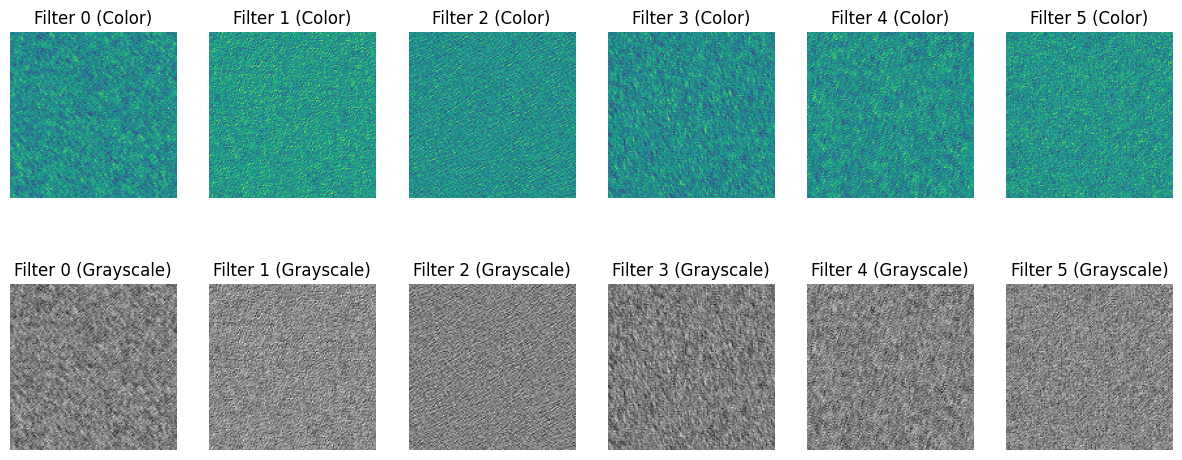

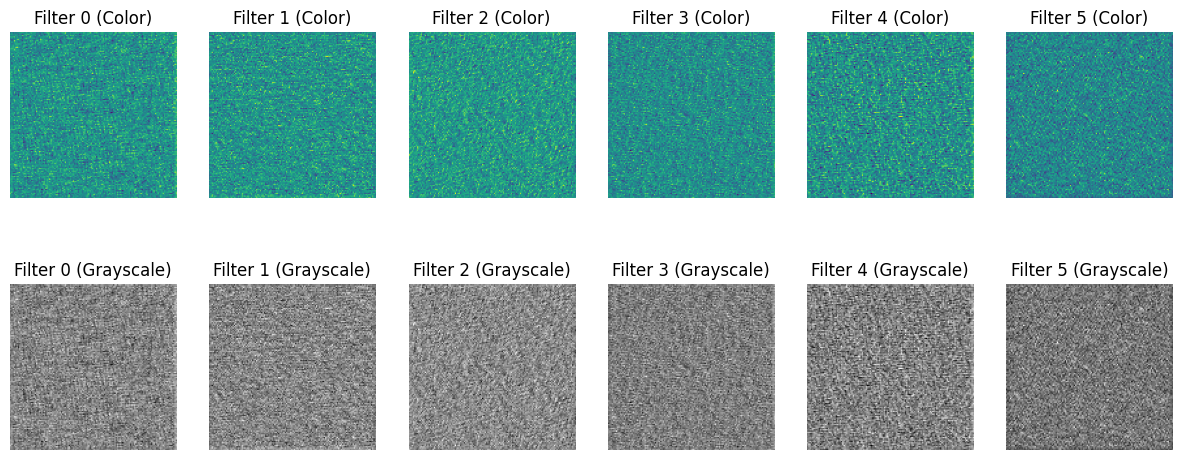

In [4]:


import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from model import CNN_classifier  # Make sure this is correct

# Load the trained model
n_classes = 37  # Change according to your setup
model = CNN_classifier(n_classes)
model.load_state_dict(torch.load("/teamspace/studios/this_studio/model_cnn.pth", map_location=torch.device('cpu')))
model.eval()

# Hook function to capture feature maps
feature_maps = {}

def hook_fn_conv1(module, input, output):
    feature_maps["conv1"] = output.detach()

def hook_fn_conv2(module, input, output):
    feature_maps["conv2"] = output.detach()

# Register the hook
model.conv1.register_forward_hook(hook_fn_conv1)
model.conv2.register_forward_hook(hook_fn_conv2)

# Example input tensor (replace with actual image preprocessing)
input_tensor = torch.randn(1, 3, 128, 128)  

# Forward pass
_ = model(input_tensor)

# Function to plot feature maps with grayscale
def plot_feature_maps(feature_maps, layer_name):
    """
    Function to plot the feature maps of a given layer in both color and grayscale.
    """
    activation = feature_maps[layer_name]  # Get feature map for the selected layer
    num_filters = activation.shape[1]  # Number of channels in the feature map
    
    # Create a figure with subplots to show color and grayscale feature maps
    fig, axes = plt.subplots(2, min(6, num_filters), figsize=(15, 6))  # 2 rows: color + grayscale

    for i in range(min(6, num_filters)):
        # Color map (Viridis)
        axes[0, i].imshow(activation[0, i].cpu().numpy(), cmap="viridis")
        axes[0, i].axis("off")
        axes[0, i].set_title(f"Filter {i} (Color)")

        # Grayscale version
        axes[1, i].imshow(activation[0, i].cpu().numpy(), cmap="gray")
        axes[1, i].axis("off")
        axes[1, i].set_title(f"Filter {i} (Grayscale)")

    plt.show()

# Call the plot function for conv1 and conv2 feature maps
if "conv1" in feature_maps:
    plot_feature_maps(feature_maps, "conv1")

if "conv2" in feature_maps:
    plot_feature_maps(feature_maps, "conv2")

     




     